In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle
import cv2
import numpy as np
import csv


In [20]:
# Load the dataset
data = pd.read_csv("leaf_features.csv")

In [21]:
data = data.drop(columns=['Image Name'])

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Leaf Count", "Leaf Area Covered"]], data["Weight"], test_size=0.1, random_state=42)

In [23]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1,10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel function
    'gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf'
}

In [24]:
# Initialize the Support Vector Regression model
svm_model = SVR()

In [25]:
# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)


In [26]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [27]:
# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [28]:
# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

In [29]:
# # Initialize the Support Vector Regression model
# svm_model = SVR(kernel='linear')

In [30]:
# # Train the model
# svm_model.fit(X_train, y_train)

In [31]:
# # Save the trained model to a file
# filename = 'svm_model_new.pkl'
# pickle.dump(svm_model, open(filename, 'wb'))

In [33]:
# # Make predictions
# y_pred = svm_model.predict(X_test)

In [34]:
# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

In [35]:
# Compute R^2 score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [36]:
# Print the best hyperparameters, R^2 score, and mean squared error
print("Best Hyperparameters:", best_params)
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
R^2 Score: -0.219
Mean Squared Error: 0.005


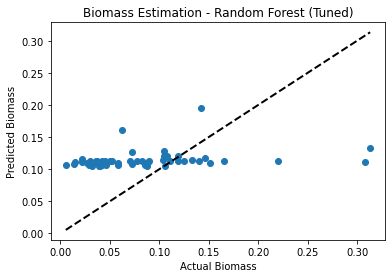

In [37]:
# Plot the actual biomass values and predicted biomass values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Biomass')
plt.ylabel('Predicted Biomass')
plt.title('Biomass Estimation - Random Forest (Tuned)')
plt.show()